# **Text to Image Generation with stable diffusion and Diffusers**

In [1]:
!pip install diffusers transformers accelerate gradio
"""
Gradio -> Useful to make a demo where you type a prompt and get an image instantly.
accelerate -> library to handle multi-GPU / CPU/GPU switching
diffusers -> library for diffusion models, Provides pre-trained diffusion pipelines (Stable Diffusion etc.)
Handles noise scheduling, denoising steps, text embeddings, and image generation for you.
"""

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

' \nGradio -> Useful to make a demo where you type a prompt and get an image instantly.\naccelerate -> library to handle multi-GPU / CPU/GPU switching\ndiffusers -> library for diffusion models, Provides pre-trained diffusion pipelines (Stable Diffusion etc.)\nHandles noise scheduling, denoising steps, text embeddings, and image generation for you.\n'

In [2]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt


In [ ]:
!pip show torch

In [3]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_auth_token=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
prompt = "A university student In his room alone with stressfull nights on laptop to get rich"

In [8]:
image = pipe(prompt).images[0]
image.save("image.png")

  0%|          | 0/50 [00:00<?, ?it/s]

[Prompt]:  A university student In his room alone with stressfull nights on laptop to get rich


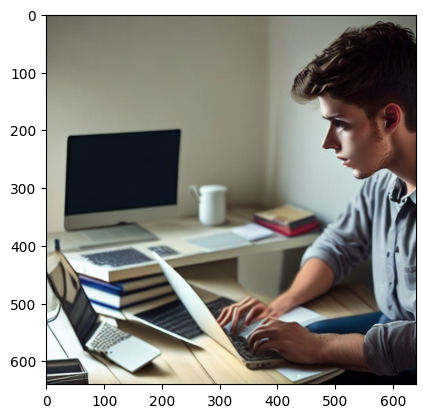

In [9]:
print("[Prompt]: ", prompt)
plt.imshow(image)
plt.show()

#  Working with stable diffusion parameters

**1. Negative prompting**
Extra text telling the model: “Do NOT include this in the image.”

**2. Num inference steps**
Each step is like a “brush stroke” in painting.
Low steps (e.g., 20–30): Fast, but image might look fuzzy or incomplete.
High steps (e.g., 50–100): More refined details, but slower.

**3. height and width**
Controls the resolution of the generated image (in pixels).
Common defaults: 512x512, 768x768.
Larger size = more GPU memory + slower generation.

**4. weight**
This tells the model: “How strongly should I follow the prompt vs. just making a random artistic image?”
Low (e.g., 3–5): Looser, more creative, sometimes ignores prompt.
High (e.g., 7–12): Very literal, sticks closely to prompt but may look unnatural if too high.

**5. num_images_per_prompt**
How many images do you want per prompt?
If you set num_images_per_prompt=4, it’s like saying:
“Draw me 4 versions of this idea, and I’ll pick the best one.”

In [4]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images > 1:
    fig , ax = plt.subplots(nrows = 1, ncols = num_images)
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].axis("off")

  else:
    fig = plt.figure()
    plt.imshow(img[0])
    plt.axis("off")
  plt.tight_layout()

In [13]:
prompt = "dreamlike beautiful girl playing the festival of colors, draped in traditional Pakistani Attire"
params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

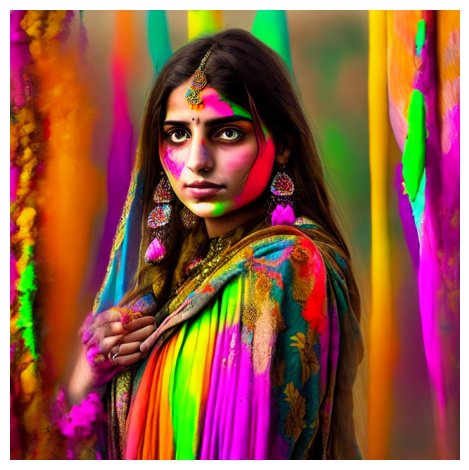

In [14]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

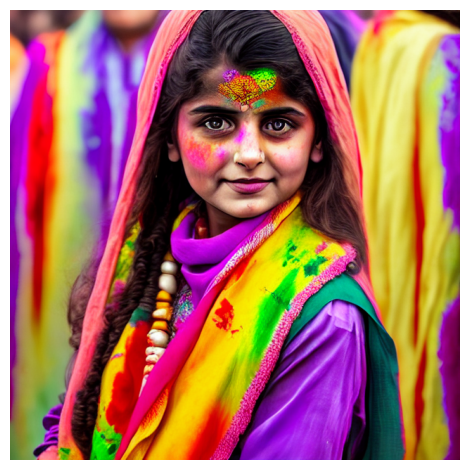

In [15]:
# Num inference steps
params = {'num_inference_steps':100}
generate_image(pipe, prompt, params)

  0%|          | 0/10 [00:00<?, ?it/s]

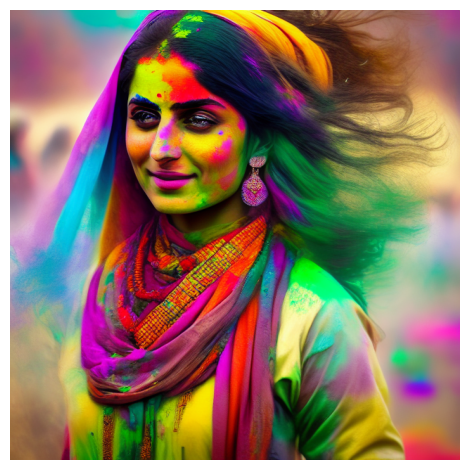

In [16]:
# Num inference steps
params = {'num_inference_steps':10}
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

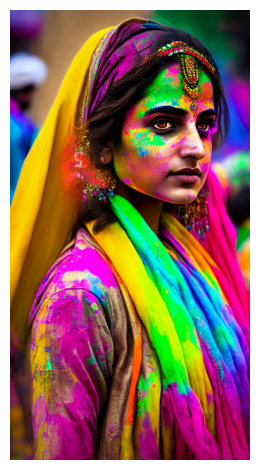

In [17]:
# Height , width
params = {'num_inference_steps':100, 'width':512, 'height':int(1.5*640)}
generate_image(pipe, prompt, params)

  0%|          | 0/50 [00:00<?, ?it/s]

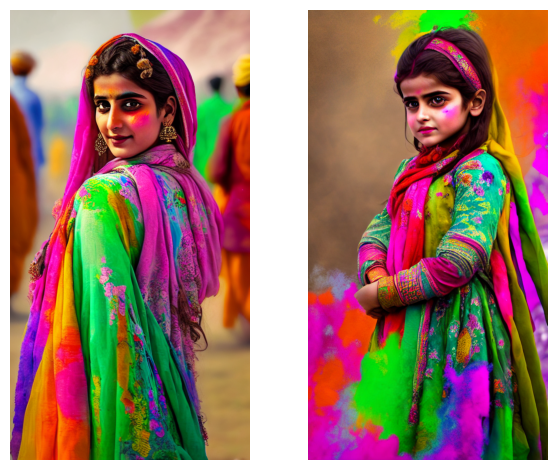

In [18]:
# Num images per prompt
params = {'num_inference_steps':50, 'width':512, 'height':int(1.5*640), 'num_images_per_prompt':2}
generate_image(pipe, prompt, params)

  0%|          | 0/50 [00:00<?, ?it/s]

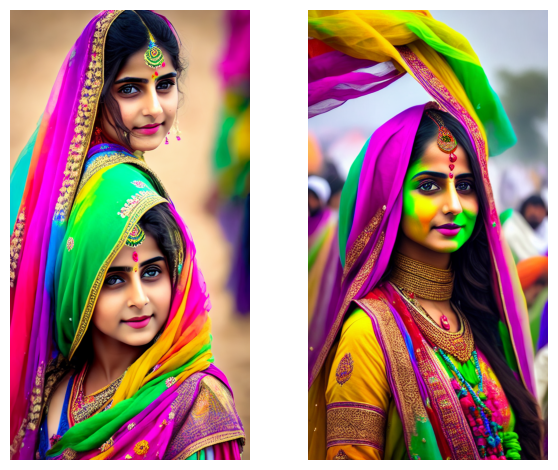

In [19]:
# Negative prompt
params = {'num_inference_steps':50, 'width':512, 'height':int(1.5*640), 'num_images_per_prompt':2, 'negative_prompt':'ugly, distorted, low quality'}
generate_image(pipe, prompt, params)